## Data Analysis 1: T-test

**Random Sample of Positive and Negative Reviews for T-test**

In [5]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

transformed_reviews_df = pd.read_csv("transformed_reviews.csv") # Read the csv file

# Acquire an equal number of positive and negative reviews based on number of negative reviews 
# as the number of negative reviews < number of positive reviews
neg_reviews = transformed_reviews_df[transformed_reviews_df['SentimentLabels'] == 'NEGATIVE']
pos_reviews = transformed_reviews_df[transformed_reviews_df['SentimentLabels'] == 'POSITIVE'].sample(n=neg_reviews.shape[0])

neg_numerator = neg_reviews['HelpfulnessNumerator'] # Extract the helpfulness numerator values
pos_numerator = pos_reviews['HelpfulnessNumerator']  

print(pos_reviews.shape)
print(neg_reviews.shape)

(1789, 9)
(1789, 9)


**Normality Test**

Positive reviews normality test p-value: 8.05177493162787e-59
Negative reviews normality test p-value: 1.3392323863178284e-49


Positive reviews normality test p-value after sqrt transform: 2.0970493773919814e-43
Negative reviews normality test p-value after sqrt transform: 6.100861770336597e-70


(array([904.,   0., 403.,   0.,   0., 273.,   0., 114.,   0.,  95.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

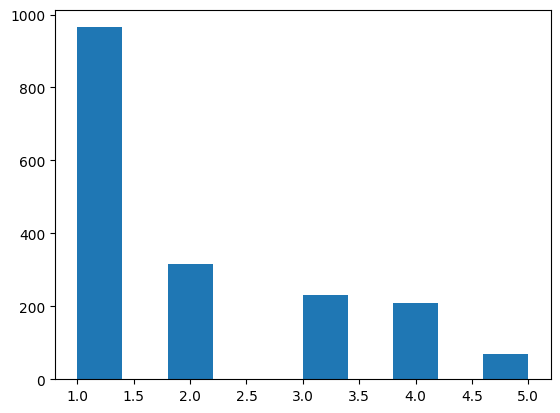

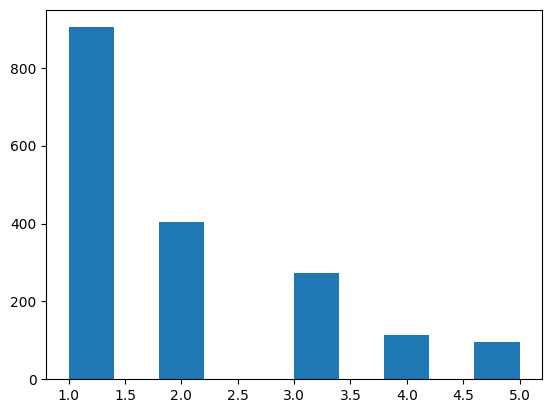

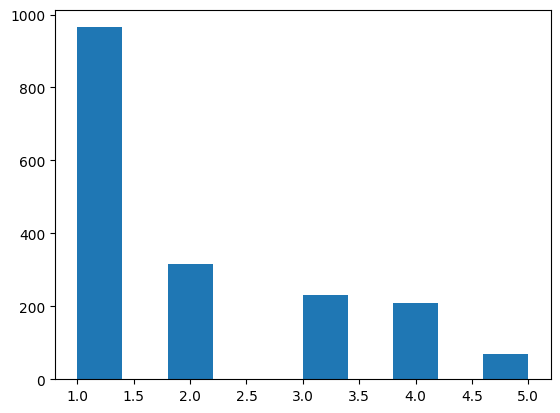

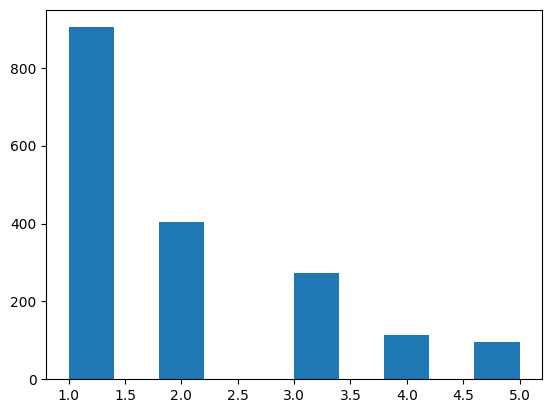

In [6]:
# Perform normality test
neg_num_normal = stats.normaltest(neg_numerator)
pos_num_normal = stats.normaltest(pos_numerator)
print("Positive reviews normality test p-value:", pos_num_normal.pvalue)
print("Negative reviews normality test p-value:", neg_num_normal.pvalue)
print("\n")

plt.hist(neg_numerator)
plt.figure()
plt.hist(pos_numerator)


# Apply squareroot transformation
pos_numerator_sqrt = np.sqrt(pos_numerator)  
neg_numerator_sqrt = np.sqrt(neg_numerator)

# Perform normality test again
pos_num_normal = stats.normaltest(pos_numerator_sqrt)
neg_num_normal = stats.normaltest(neg_numerator_sqrt)
print("Positive reviews normality test p-value after sqrt transform:", pos_num_normal.pvalue)
print("Negative reviews normality test p-value after sqrt transform:", neg_num_normal.pvalue)

plt.figure()
plt.hist(neg_numerator)
plt.figure()
plt.hist(pos_numerator)


**Equal Variance Test**

In [7]:
# Perform the equal variance test
ev_test = stats.levene(pos_numerator, neg_numerator)
print("Levene's test p-value:", ev_test.pvalue)
print("\n")

# Perform the equal variance test (w/ sqrt transformation)
ev_test_sqrt = stats.levene(pos_numerator_sqrt, neg_numerator_sqrt)
print("Levene's test p-value after sqrt transformation:", ev_test_sqrt.pvalue)

Levene's test p-value: 0.9000057590621484


Levene's test p-value after sqrt transformation: 0.8559386005629256


**Perform U-test**

In [8]:
u_stat, p_val = stats.mannwhitneyu(pos_numerator, neg_numerator)
print(pos_numerator.mean(), pos_numerator.std()) # Positive numerator mean and std
print(neg_numerator.mean(), neg_numerator.std()) # Negative numerator mean and std
print("p_val:", p_val)

1.9340413638904417 1.177771585056065
1.9390721073225266 1.2165798273608066
p_val: 0.4792569021990548
